In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=696d451b8f99d935e4028d7f65e6554a795fa9c9ba106926f597a098179d17bb
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Initial state of qubit 0:


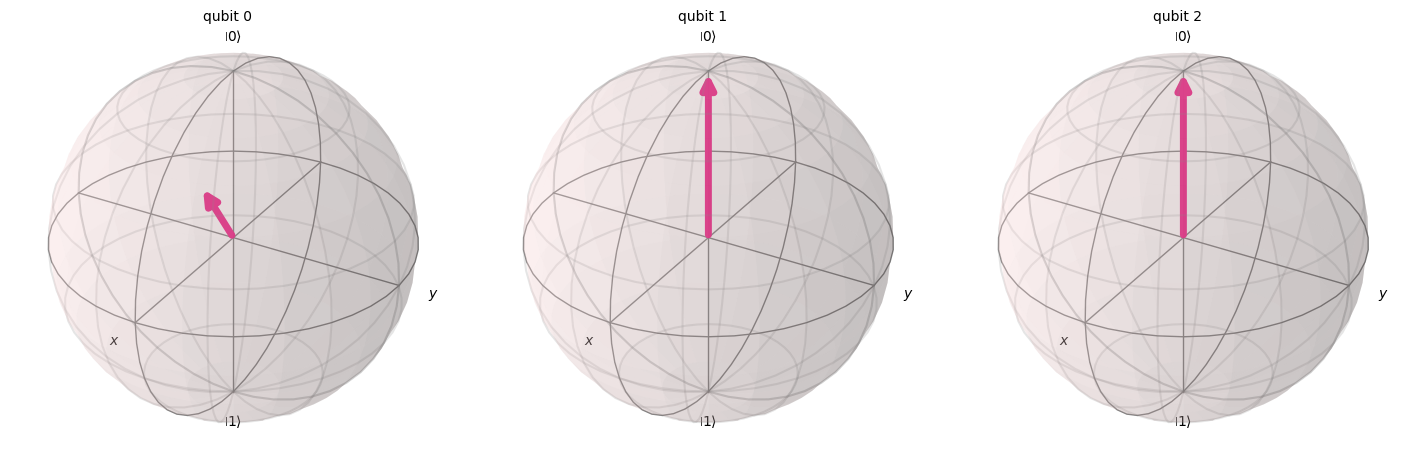

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


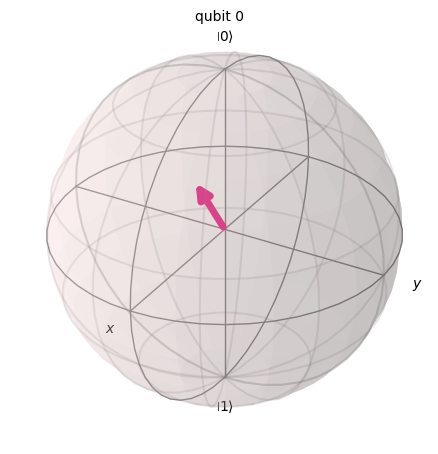

In [2]:
# Quantum Teleportation (Coherent version) – Qiskit 2.x compatible
# Works on modern qiskit-aer simulators

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Build the teleportation circuit
qc = QuantumCircuit(3)

# Prepare arbitrary state |ψ⟩ on qubit 0
theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Save initial state for comparison
sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

# Create Bell pair between qubits 1 and 2
qc.h(1)
qc.cx(1, 2)

# Bell measurement part (but coherent)
qc.cx(0, 1)
qc.h(0)

# Coherent corrections
qc.cx(1, 2)
qc.cz(0, 2)

# Save final statevector explicitly (Qiskit 2.x requires this)
qc.save_statevector()

# 2️⃣ Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Retrieve the saved statevector
sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

# 3️⃣ Compare: initial vs Bob’s (qubit 2) final state
rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

# Extract the dominant pure states (since both should be pure)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

# Compute fidelity
fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")

# 4️⃣ Visualize Bloch spheres (fixed)
print("\nBob’s final qubit (qubit 2) Bloch vector:")

# Convert rho_bob (DensityMatrix) → pure statevector (dominant eigenvector)
eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]  # dominant eigenvector
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

/usr/local/lib/python3.12/dist-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.12/dist-packages/matplotlib/transforms.py:1853: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


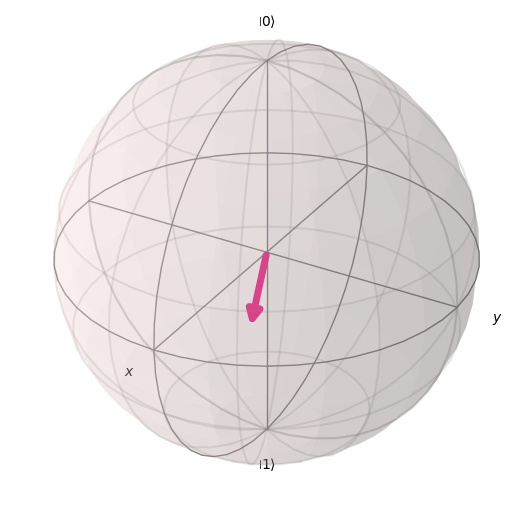

In [3]:
# 🧩 Task 1: Custom State Teleportation
from math import pi
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector

theta = pi / 4   # try pi/4, pi/2, 3*pi/4, etc.
phi = pi / 2     # try 0, pi/2, pi, etc.

qc = QuantumCircuit(3)
qc.ry(theta, 0)
qc.rz(phi, 0)

state = Statevector.from_instruction(qc)
plot_bloch_vector(state.data)


In [ ]:
# 📈 Task 3: Fidelity Analysis
import numpy as np
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.quantum_info import Statevector, state_fidelity

def random_angles(n=10):
    return [(np.random.uniform(0, np.pi), np.random.uniform(0, 2*np.pi)) for _ in range(n)]

simulator = Aer.get_backend('statevector_simulator')
fidelities = []

for theta, phi in random_angles(20):
    qc = QuantumCircuit(3, 2)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    qc.h(1)
    qc.cx(1, 2)
    qc.cx(0, 1)
    qc.cz(0, 2)

    result = simulator.run(qc).result()
    final_state = Statevector(result.get_statevector(qc))
    target = Statevector.from_instruction(QuantumCircuit(1).ry(theta, 0).rz(phi, 0))
    fidelities.append(state_fidelity(final_state, target))

plt.plot(fidelities, 'o-')
plt.xlabel("Trial")
plt.ylabel("Fidelity")
plt.title("Teleportation Fidelity across Random States")
plt.show()

print("Average fidelity:", np.mean(fidelities))


**After state preparation (Alice's qubit 0):**

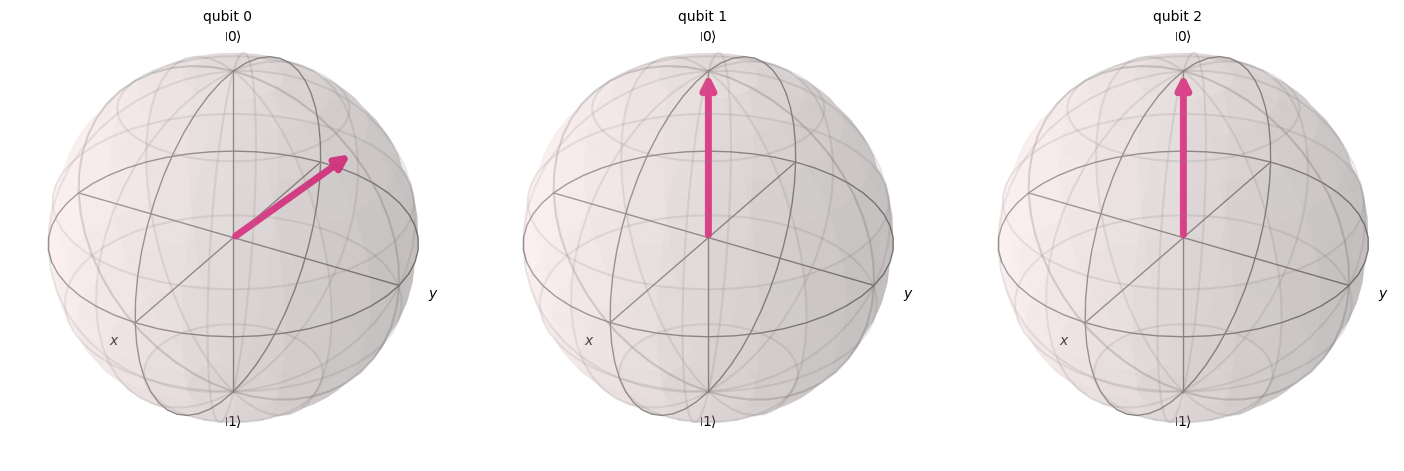

**After Bell pair (H on q1; CX q1->q2):**

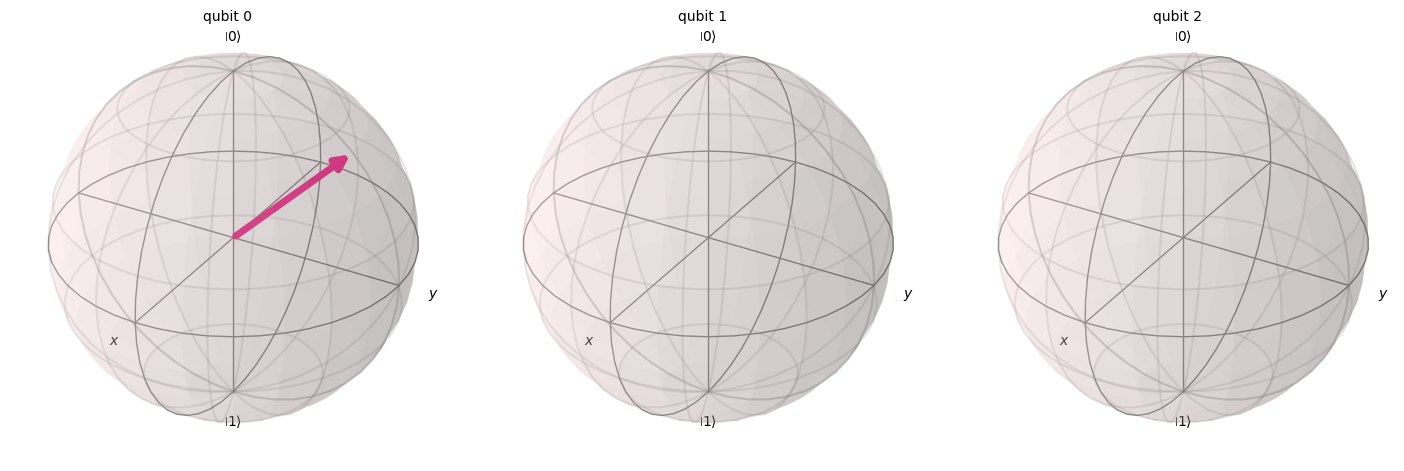

**After Alice's Bell-measurement unitaries (CX 0->1; H 0):**

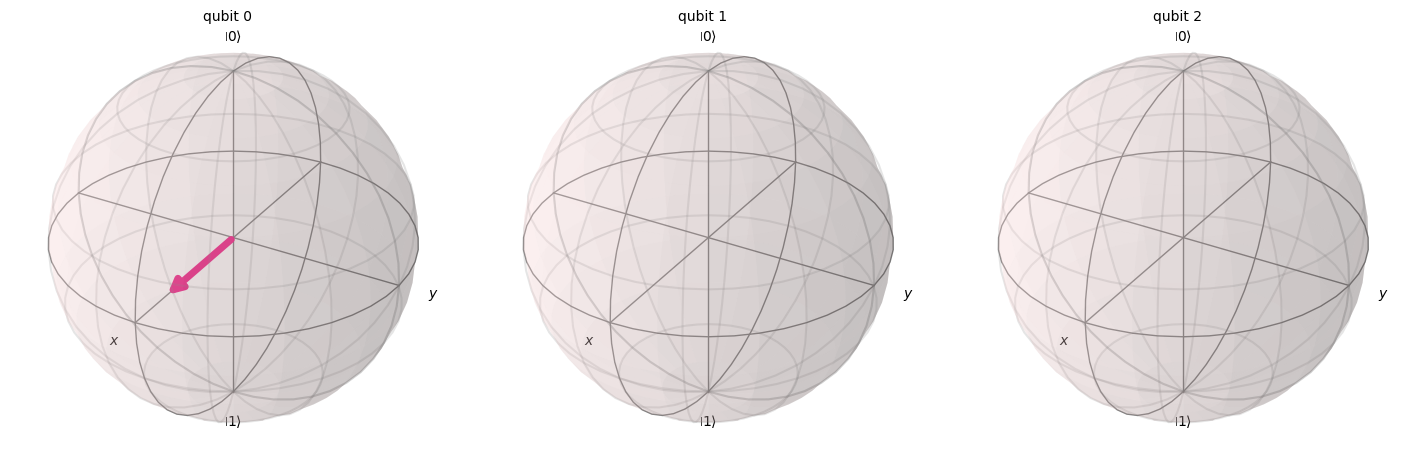

**After coherent corrections (CZ 0->2; CX 1->2):**

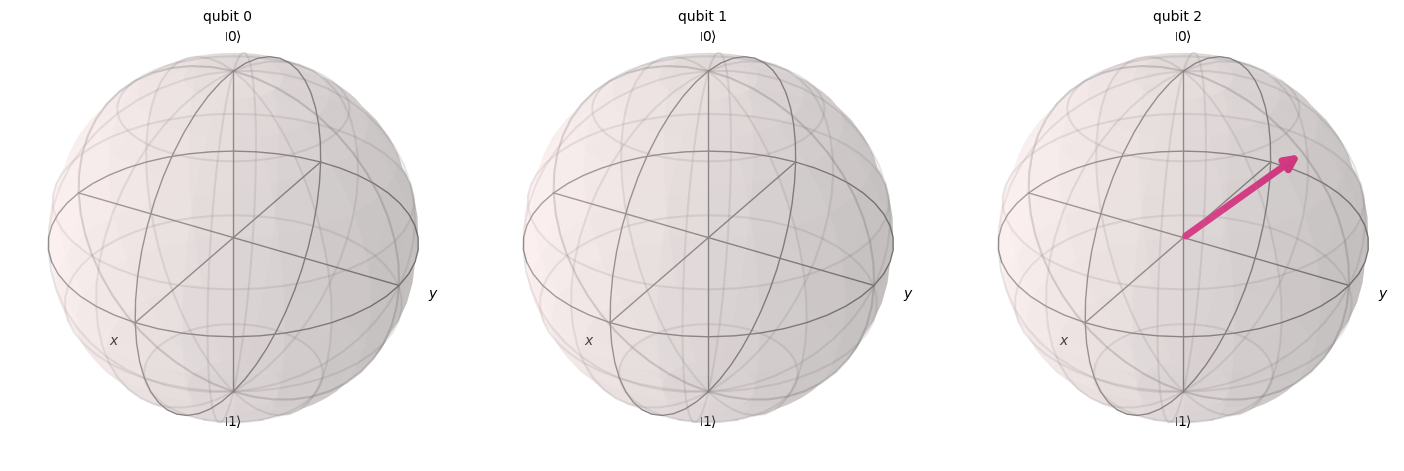

**Bob's reduced Bloch vector (should match Alice's initial state):**

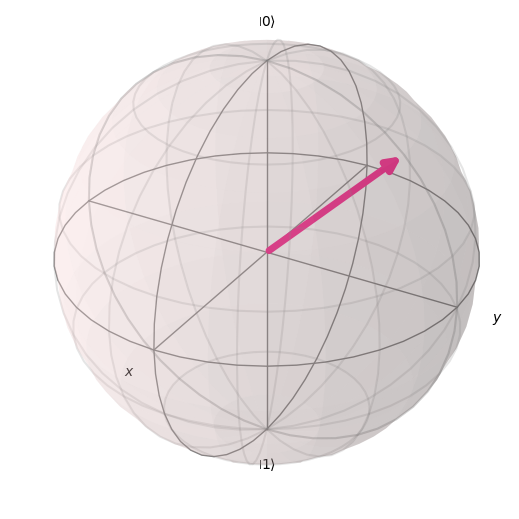

In [7]:
# Task 4: Step-by-step visualization (correct)
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
from IPython.display import display, Markdown

# choose input state
theta = pi/4
phi   = pi/2

# Helper to get Bloch vector for a single-qubit density matrix
def bloch_vector_from_density(dm):
    # dm: qiskit.quantum_info.DensityMatrix or 2x2 np.array
    # Bloch vector components: <X>, <Y>, <Z>
    import numpy as np
    from qiskit.quantum_info import Operator
    sigma_x = Operator([[0,1],[1,0]])
    sigma_y = Operator([[0,-1j],[1j,0]])
    sigma_z = Operator([[1,0],[0,-1]])
    if not hasattr(dm, 'data'):
        rho = dm
    else:
        rho = dm.data
    return [np.real(np.trace(rho.dot(sigma.data))) for sigma in (sigma_x, sigma_y, sigma_z)]

# Build circuit (coherent teleportation: no measurement; use quantum-controlled corrections)
qc = QuantumCircuit(3)

# 1) Prepare Alice's state on qubit 0
qc.ry(theta, 0)
qc.rz(phi, 0)
sv1 = Statevector.from_instruction(qc)
display(Markdown("**After state preparation (Alice's qubit 0):**"))
display(plot_bloch_multivector(sv1))  # shows whole multivector (all qubits)

# 2) Create Bell pair between qubits 1 & 2
qc.h(1)
qc.cx(1, 2)
sv2 = Statevector.from_instruction(qc)
display(Markdown("**After Bell pair (H on q1; CX q1->q2):**"))
display(plot_bloch_multivector(sv2))

# 3) Alice's Bell-measurement unitaries (CX 0->1, H on 0)
qc.cx(0, 1)
qc.h(0)
sv3 = Statevector.from_instruction(qc)
display(Markdown("**After Alice's Bell-measurement unitaries (CX 0->1; H 0):**"))
display(plot_bloch_multivector(sv3))

# 4) Coherent corrections as quantum-controlled gates (instead of measure + classical c_if)
#    Z on Bob (q2) controlled by q0, and X on Bob controlled by q1
qc.cz(0, 2)   # controlled-Z with control q0, target q2
qc.cx(1, 2)   # controlled-X with control q1, target q2

sv4 = Statevector.from_instruction(qc)
display(Markdown("**After coherent corrections (CZ 0->2; CX 1->2):**"))
display(plot_bloch_multivector(sv4))

# Extract Bob's reduced density matrix (partial trace) and show his Bloch vector
rho_full = DensityMatrix(sv4)
rho_bob = partial_trace(rho_full, [0,1])  # keep qubit 2 (indexing 0,1,2 -> trace out 0 & 1)
bv = bloch_vector_from_density(rho_bob)
display(Markdown("**Bob's reduced Bloch vector (should match Alice's initial state):**"))
display(plot_bloch_vector(bv))


In [12]:
from qiskit import QuantumCircuit, execute
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define proper noise model ---
noise_model = NoiseModel()

# 1-qubit gate noise (X, Z, H)
one_qubit_error = depolarizing_error(0.02, 1)
# 2-qubit gate noise (CX)
two_qubit_error = depolarizing_error(0.02, 2)
# Amplitude damping error (for idle)
damping_error = amplitude_damping_error(0.02)

# Apply noise correctly
noise_model.add_all_qubit_quantum_error(one_qubit_error, ['x', 'z', 'h'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])
noise_model.add_all_qubit_quantum_error(damping_error, ['id'])

# --- Step 2: Build teleportation circuit ---
qc = QuantumCircuit(3, 2)
qc.h(0)             # Prepare |+> state to teleport
qc.cx(0, 1)         # Entangle qubits 0 & 1
qc.h(1)
qc.cx(1, 2)         # Entangle qubit 1 & 2
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
qc.x(2).c_if(0, 1)
qc.z(2).c_if(1, 1)

# --- Step 3: Simulate teleportation with noise ---
simulator = AerSimulator(method='density_matrix', noise_model=noise_model)
qc_no_measure = qc.remove_final_measurements(inplace=False)
job = execute(qc_no_measure, simulator)
result = job.result()
rho_final = result.data(0)['final_density_matrix']

# --- Step 4: Compare fidelity with ideal state ---
ideal_state = Statevector.from_label('+')
fidelity = state_fidelity(rho_final, ideal_state)
print(f"Fidelity under noise: {fidelity:.4f}")

# --- Step 5: Noise variation test ---
noise_levels = np.linspace(0, 0.1, 10)
fidelities = []

for p in noise_levels:
    nm = NoiseModel()
    one_err = depolarizing_error(p, 1)
    two_err = depolarizing_error(p, 2)
    nm.add_all_qubit_quantum_error(one_err, ['x', 'z', 'h'])
    nm.add_all_qubit_quantum_error(two_err, ['cx'])
    sim = AerSimulator(method='density_matrix', noise_model=nm)
    job = execute(qc_no_measure, sim)
    rho = job.result().data(0)['final_density_matrix']
    fidelities.append(state_fidelity(rho, ideal_state))

# --- Step 6: Plot fidelity vs noise ---
plt.figure(figsize=(6, 4))
plt.plot(noise_levels, fidelities, marker='o', color='blue')
plt.xlabel("Depolarizing Error Probability")
plt.ylabel("Fidelity")
plt.title("Quantum Teleportation Fidelity under Noise")
plt.grid(True)
plt.show()


ImportError: cannot import name 'execute' from 'qiskit' (/usr/local/lib/python3.12/dist-packages/qiskit/__init__.py)